<a href="https://www.kaggle.com/jakkojukranti/tsa-analysis-practice?scriptVersionId=88770992" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
##Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns


In [2]:
##Defining functions 
##auto_correlation
def auto_corr(v):
    corr1 = []
    corr1.append(1)
    def cov(v,i):
        v1 = v[:-i]
        v2 = v[i:]
        mean1 = np.mean(v)
        cov = sum((np.array(v1) - mean1)*(np.array(v2) - mean1))/len(v)
        cov0 = sum((np.array(v) - mean1)**2)/len(v)
        return round(cov/cov0,2)
    for i in range(1,len(v)):
        corr1.append(cov(v,i))
    return(corr1)


##Simple Exponential Smoothing

def simp_exp_smooth(v,alpha):
    v = pd.Series(v)
    v1 = v.shift(1).fillna(0)
    smooth1 = alpha*(np.array(v))+(1-alpha)*(np.array(v1))
    smooth1[0] = v[0]
    return smooth1
    
    

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-time-series-20050101-to-20171231/CAT_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UTX_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PFE_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/PG_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/UNH_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/JNJ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/VZ_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/AABA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/BA_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/KO_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MCD_2006-01-01_to_2018-01-01.csv
/kaggle/input/stock-time-series-20050101-to-20171231/MRK_

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


<AxesSubplot:xlabel='Date', ylabel='Open'>

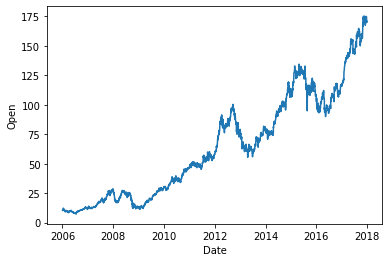

In [4]:
#reading the stocks data
all_stocks = pd.read_csv("/kaggle/input/stock-time-series-20050101-to-20171231/all_stocks_2006-01-01_to_2018-01-01.csv")
all_stocks.head()
aapl = all_stocks[all_stocks["Name"] == "AAPL"]
aapl = aapl[["Date","Open"]]
aapl.head()
aapl["Date"] = pd.to_datetime(aapl["Date"])
aapl["Year"] = aapl["Date"].apply(lambda x: int(pd.datetime.strftime(x,"%Y")))
aapl.index = aapl["Date"]
sns.lineplot(data = aapl["Open"])

(3019, 1)
(626, 1)


<AxesSubplot:xlabel='Date'>

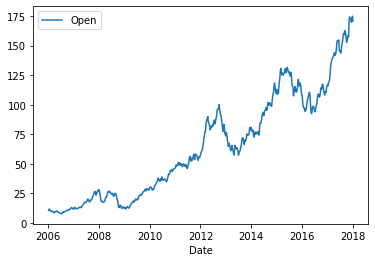

In [5]:
##Resampling
aapl = aapl['Open']
aapl = pd.DataFrame(aapl)
print(aapl.shape)
aapl = aapl.resample("W").mean().pad()
print(aapl.shape)
sns.lineplot(data = aapl.resample("W").mean().pad())

<AxesSubplot:xlabel='Date'>

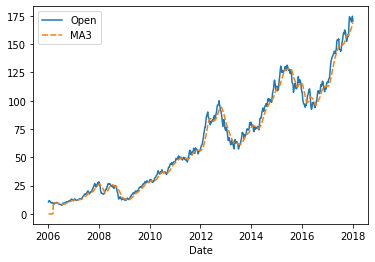

In [6]:
aapl["Smooth6"] = simp_exp_smooth(aapl["Open"],0.2)
aapl["MA3"] = aapl["Open"].rolling(11).mean().fillna(0)
sns.lineplot(data = aapl[["Open","MA3"]])